# Week-4: Part-1


In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Set size of figure
plt.rcParams['figure.figsize'] = [8, 8]
# Set size of font
plt.rcParams['font.size'] = 10

## Sampling

Sampling from a distribution is an important skill. While learning ML, it is often a good idea to work with toy-datasets. These toy-datasets can be generated from well known distributions such as the Bernoulli and Gaussian. The next section will introduce the idea of sampling in NumPy.

### Random number generator

We can sample from distributions with the help of a random number generator:

In [2]:
rng = np.random.default_rng()

We will start by generating a dataset of ones and zeros. The following code generates a sample of size $10$.

In [4]:
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 10)
X

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

Notice that we have used a seed value as an argument to the random number generator. This is meant to ensure reproducability. That is, no matter how many times this cell is run, we will get the same sequence of random numbers. First run the cell a few times to verify that this is true. Now, run the cell with a different seed value and see what happens.

## Problem-1

For the dataset `X` given below, what is the maximum likelihood estimate of the mean if we use a Bernoulli distribution with parameter $p$ to model this data? Perform all your operations in the cell given below. Do not change the seed value. Enter your answer correct to three decimal places.

In [9]:
### Data ###
rng = np.random.default_rng(seed = 1001)
X = rng.integers(0, 2, size = 1000)
### Solution ###
# Calculate MLE for p (sample mean)
p_ml = np.mean(X)
p_ml_rounded = round(p_ml, 3)
p_ml, p_ml_rounded

(np.float64(0.506), np.float64(0.506))

What happens if we increase the size of the dataset to $10000$? We see that `np.integers` is only giving us observations from a discrete uniform distribution. In other words, if you think about it as a coin toss, the coin is unbiased. How do we generate samples from a biased coin or a Bernoulli distribution with $p \neq 0.5$? We use a method called `choice`. This method "chooses" numbers from a list or an array based on the probabilities given to it in the array `p`.

In [7]:
rng = np.random.default_rng(seed = 1001)
X = rng.choice([0, 1], size = 10000, p = [0.2, 0.8])

# Calculate MLE for p (sample mean)
p_ml = np.mean(X)
p_ml_rounded = round(p_ml, 3)
p_ml, p_ml_rounded

(np.float64(0.7975), np.float64(0.798))

Note that the array `p` specifies the probabilities of $0$ and $1$.

## Problem-2

Sample $1000$ points from a  Bernoulli distribution whose parameter is $p = 0.7$. Compute the maximum likelihood estimate of the parameter given this sample. Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

**Note**:

- The parameter $p$ of a Bernoulli distribution always points to $P(x = 1)$.

- It may seem pointless to compute the MLE when the parameter is already known to us. But this is a good exercise to verify our understanding of concepts with such toy-datasets.

In [10]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###

# Generate 1000 Bernoulli samples with p=0.7
X = rng.binomial(n=1, p=0.7, size=1000)

# Compute MLE (sample mean)
p_ml = np.mean(X)
p_ml_rounded = round(p_ml, 3)
p_ml, p_ml_rounded

(np.float64(0.707), np.float64(0.707))

## Problem-3

Plot a bar graph of the above sample. You can use the `plt.bar` method. To know more about a method in Google Colab type `plt.bar?` in a cell and run it.

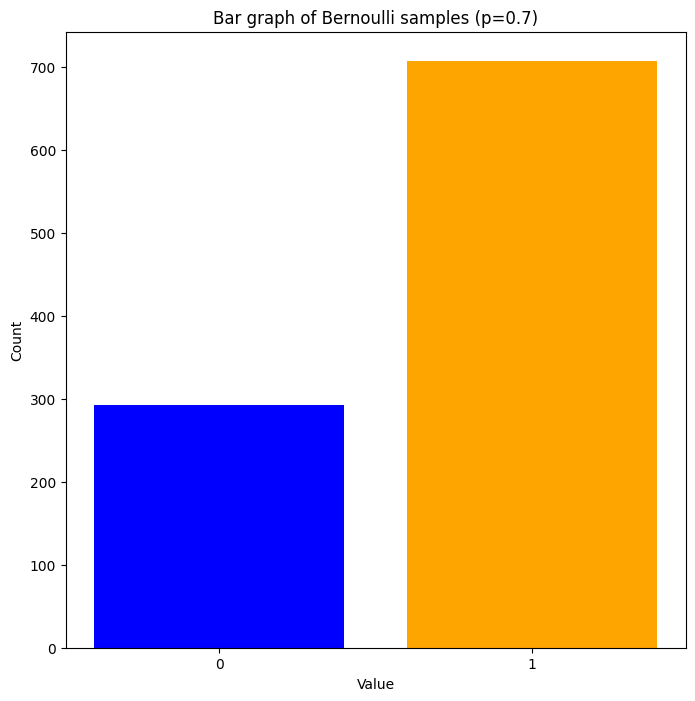

In [11]:
### Solution ###

import numpy as np
import matplotlib.pyplot as plt

# Initialize RNG with seed 1001
rng = np.random.default_rng(seed=1001)

# Generate 1000 Bernoulli samples with p=0.7
X = rng.binomial(n=1, p=0.7, size=1000)

# Count the occurrences of 0s and 1s
counts = np.bincount(X)

# Plotting the bar graph
plt.bar([0, 1], counts, color=['blue', 'orange'])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Bar graph of Bernoulli samples (p=0.7)')
plt.xticks([0, 1])
plt.show()

## Problem-4

What is the impact of the size of the dataset on the MLE? Generate datasets of the following sizes:

- $n = 10$
- $n = 100$
- $n = 1000$
- $n = 10000$
- $n = 100000$
- $n = 1000000$

Sample each dataset from a Bernoulli distribution with parameter $p = 0.2$. For each dataset, first compute the MLE and then compute the difference (abs value) between the MLE and the true parameter. That is, compute the value $d$ for different values of $n$

$$
d(n) = |\hat{p}_{ML} - p|
$$

Plot $d(n)$ with respect to $n$. What do you osbserve?


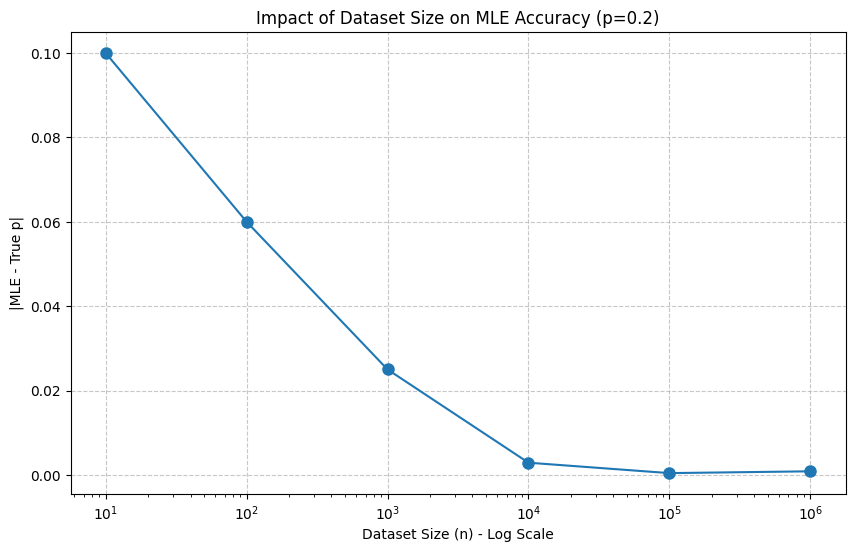

In [12]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###
p_true = 0.2
n_values = [10, 100, 1000, 10000, 100000, 1000000]
d_values = []

for n in n_values:
    # Generate Bernoulli samples
    X = rng.binomial(n=1, p=p_true, size=n)
    # Compute MLE (sample mean)
    p_ml = np.mean(X)
    # Calculate absolute error
    d_n = abs(p_ml - p_true)
    d_values.append(d_n)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(n_values, d_values, 'o-', markersize=8)
plt.xscale('log')
plt.xlabel('Dataset Size (n) - Log Scale')
plt.ylabel('|MLE - True p|')
plt.title('Impact of Dataset Size on MLE Accuracy (p=0.2)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Problem-5

Sample $1000$ points from a six sided, biased die with faces: $1, 2, 3, 4, 5, 6$. The parameters corresponding to the six faces are:

$$
[0.1, 0.2, 0.3, 0.3, 0.05, 0.05]
$$

Note that this is a categorical distribution. Refer to the practice assignment for a similar problem. Find the maximum likelihood estimate of the parameter $p_3$ (corresponds to the third face). Perform all your operations in the cell given below. Enter your answer correct to three decimal places.

In [13]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###

# Parameters: probabilities for faces 1-6
p = [0.1, 0.2, 0.3, 0.3, 0.05, 0.05]

# Generate 1000 samples from categorical distribution
samples = rng.choice([1, 2, 3, 4, 5, 6], size=1000, p=p)

# Calculate MLE for p3 (frequency of face 3)
p3_ml = np.mean(samples == 3)
p3_ml_rounded = round(p3_ml, 3)
p3_ml_rounded

np.float64(0.319)

## Problem-6

Plot the bar graph for the above sample.

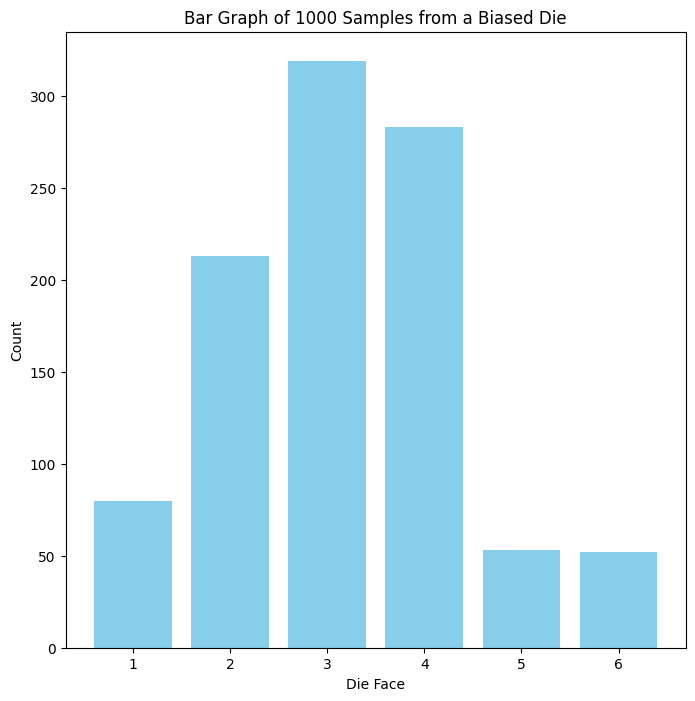

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize RNG with seed 1001
rng = np.random.default_rng(seed=1001)

# Parameters for the die
p = [0.1, 0.2, 0.3, 0.3, 0.05, 0.05]

# Generate 1000 samples
samples = rng.choice([1, 2, 3, 4, 5, 6], size=1000, p=p)

# Count occurrences for each face (faces are 1-indexed)
counts = [np.sum(samples == face) for face in range(1, 7)]

# Plot the bar graph
plt.bar(range(1, 7), counts, color='skyblue')
plt.xlabel('Die Face')
plt.ylabel('Count')
plt.title('Bar Graph of 1000 Samples from a Biased Die')
plt.xticks(range(1, 7))
plt.show()


We now move to the Gaussian distribution. First, we shall get used to computing the density of a Gaussian given its mean and variance.

## Problem-7

Consider the following Gaussian distribution:

$$
\mathcal{N}(3, 1.5^2)
$$

Compute the density of the point $5$ with respect to this distribution. Enter your answer correct to three decimal places.

In [15]:
## Solution ##
import math

def gaussian_density(x, mu, sigma):
    """Compute Gaussian density at x given mean mu and std deviation sigma"""
    return (1 / (sigma * math.sqrt(2 * math.pi))) * math.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Parameters
mu = 3
sigma = 1.5
x = 5

# Compute density
density = gaussian_density(x, mu, sigma)
density_rounded = round(density, 3)

print(f"Density at x={x}: {density_rounded:.3f}")


Density at x=5: 0.109


Now, we shall move to sampling from a Gaussian distribution.

## Problem-8

Generate a dataset of $1000$ points from a Gaussian distribution with mean $3$ and standard deviation $1.5$. Find the maximum likelihood estimate of the mean for this dataset. Enter your answer correct to three decimal places. Use the cell given below for all your computations. You can search for the method to use from the NumPy docs. It is quite similar to what we did for the case of the Bernoulli and categorical distributions.

In [16]:
### RNG ###
rng = np.random.default_rng(seed = 1001)
### Solution ###

# Generate 1000 samples from Gaussian(μ=3, σ=1.5)
X = rng.normal(loc=3, scale=1.5, size=1000)

# Compute MLE of mean (sample mean)
mu_ml = np.mean(X)
mu_ml_rounded = round(mu_ml, 3)
mu_ml_rounded

np.float64(2.944)

## Problem-9

Plot the histogram of the dataset given above. Use the `plt.hist` method.

In [ ]:
## Solution ##

We will now turn to understanding the shapes of the Beta distribution for different values of parameters $\alpha$ and $\beta$.

## Problem-10

Plot the beta distribution for the following values:

- $\alpha = 5, \beta = 5$
- $\alpha = 5, \beta = 1.5$
- $\alpha = 1.5, \beta = 5$
- $\alpha = 0.5, \beta = 0.5$


Do not worry about the normalization constant. Use `plt.subplot(2, 2, i)` to plot all four distributions in a single figure. `i` should take the values 1, 2, 3 and 4 for these four subplots. If you are not sure how it works, google it. Stackoverflow will be of great help here.

/tmp/ipython-input-17-1703718562.py:8: RuntimeWarning: divide by zero encountered in power
  return x**(a-1) * (1-x)**(b-1)


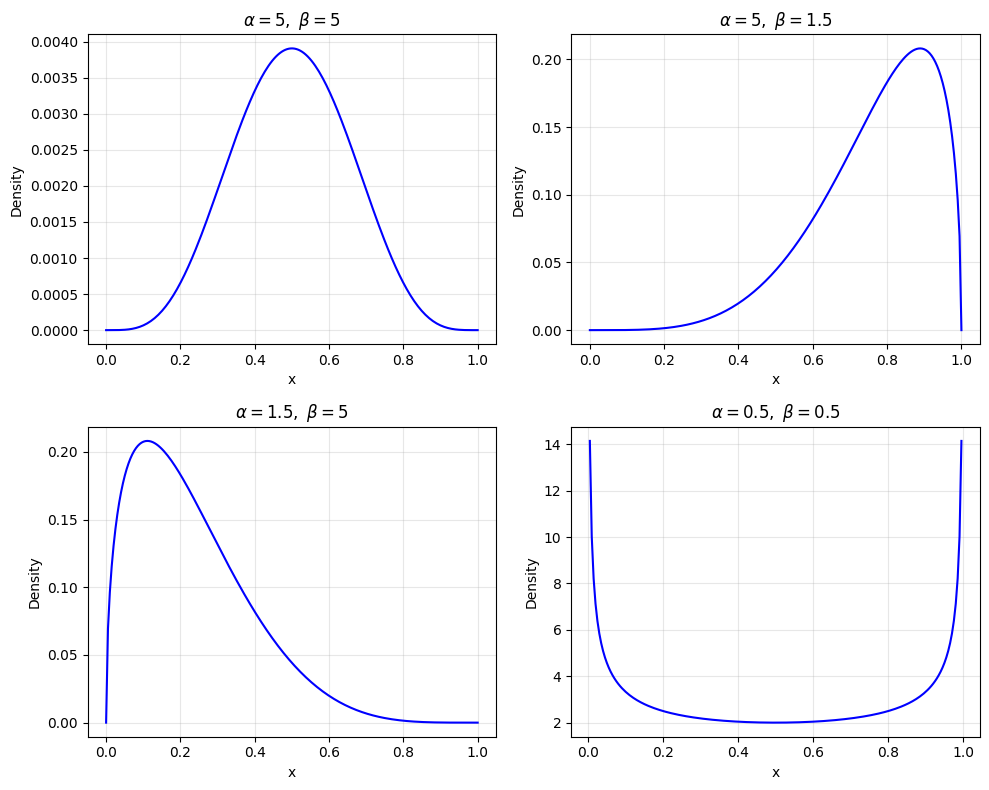

In [17]:
## Solution ##
## Solution ##
import numpy as np
import matplotlib.pyplot as plt

# Beta PDF (unnormalized, as normalization is not required for this task)
def beta_pdf(x, a, b):
    return x**(a-1) * (1-x)**(b-1)

# x values in (0, 1)
x = np.linspace(0, 1, 200)

# Parameter sets
params = [
    (5, 5),
    (5, 1.5),
    (1.5, 5),
    (0.5, 0.5)
]

titles = [
    r'$\alpha=5, \ \beta=5$',
    r'$\alpha=5, \ \beta=1.5$',
    r'$\alpha=1.5, \ \beta=5$',
    r'$\alpha=0.5, \ \beta=0.5$'
]

plt.figure(figsize=(10, 8))
for i, ((a, b), title) in enumerate(zip(params, titles), 1):
    plt.subplot(2, 2, i)
    plt.plot(x, beta_pdf(x, a, b), color='b')
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
